Set up - Import Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import initializers
from keras import callbacks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/train7291.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test2007.csv")

Panda to numpy array

In [4]:
train_dataset = df_train.values
test_dataset = df_test.values

# Getting the features from the data set (X)
x_train = train_dataset[:,1:257]
x_test = test_dataset[:,1:257]

# Getting the labels from the data set (Y)
y_train = train_dataset[:,0]
y_test = test_dataset[:,0]

Understand the data


In [5]:
print("Train dataset features...")
print("Size: ", x_train.size)
print("Dimensions: ", x_train.ndim)
print("Shape: ", x_train.shape)
print("\nTest dataset features...")
print("Size: ", x_test.size)
print("Dimensions: ", x_test.ndim)
print("Shape: ", x_test.shape)

Train dataset features...
Size:  1866496
Dimensions:  2
Shape:  (7291, 256)

Test dataset features...
Size:  513792
Dimensions:  2
Shape:  (2007, 256)


In [6]:
# Need to convert the labels to type int...BE SURE TO RE-INITIALIZE! 
y_train = y_train.astype(int)
print("Train labels:")
print("Dimensions: ", y_train.ndim)
print("Shape: ", y_train.shape)

y_test = y_test.astype(int)
print("\nTest labels:")
print("Dimensions: ", y_test.ndim)
print("Shape: ", y_test.shape)

Train labels:
Dimensions:  1
Shape:  (7291,)

Test labels:
Dimensions:  1
Shape:  (2007,)


In [7]:
# 0 -> 9 CAUTION,...RUNNING THIS BLOCK MORE THAN ONCE WILL BREAK THE MODEL. 
num_classes = 10
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)

In [36]:
model = Sequential()
model.add(Dense(20, input_dim=256,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add((Dense(10, activation='softmax')))

In [37]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 20)                5140      
_________________________________________________________________
dense_33 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                210       
Total params: 6,190
Trainable params: 6,190
Non-trainable params: 0
_________________________________________________________________


In [24]:
# model with zero wight initializer
'''

initializerZero = keras.initializers.Zeros()

model = Sequential()
model.add(Dense(20, input_dim=256,activation='relu', kernel_initializer=initializerZero))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh', kernel_initializer=initializerZero))
model.add((Dense(10, activation='softmax')))
model.summary()
'''

In [ ]:
# model with orthogonal class wight initializer
'''

initializerOth = keras.initializers.Orthogonal(gain=1.0, seed=None)

model = Sequential()
model.add(Dense(20, input_dim=256,activation='relu', kernel_initializer=initializerOth))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh', kernel_initializer=initializerOth))
model.add((Dense(10, activation='softmax')))
model.summary()
'''

In [ ]:
# model with Random Normal values wight initializer
'''
initializerRanNorm = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

model = Sequential()
model.add(Dense(20, input_dim=256,activation='relu', kernel_initializer=initializerRanNorm))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='tanh', kernel_initializer=initializerRanNorm))
model.add((Dense(10, activation='softmax')))
model.summary()
'''

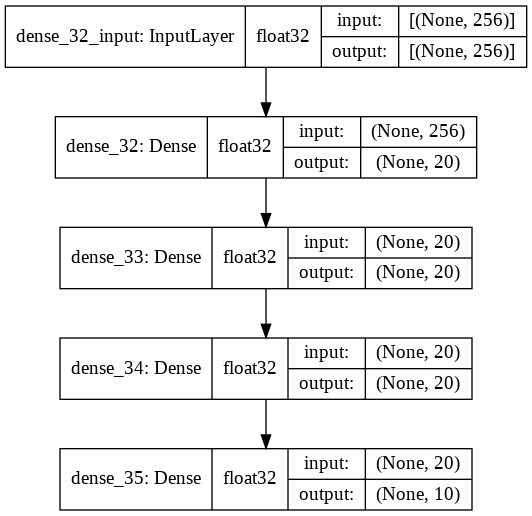

In [38]:
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [39]:
 model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [40]:
# when fitting can specify 
early_stopping = callbacks.EarlyStopping(monitor ='val_loss', mode ='min', patience = 5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_split = 0.3, callbacks=[early_stopping])

Epoch 1/15
40/40 [==============================] - 1s 9ms/step - loss: 1.8741 - accuracy: 0.4004 - val_loss: 1.4855 - val_accuracy: 0.5996
Epoch 2/15
40/40 [==============================] - 0s 4ms/step - loss: 1.1924 - accuracy: 0.6804 - val_loss: 0.9375 - val_accuracy: 0.7381
Epoch 3/15
40/40 [==============================] - 0s 4ms/step - loss: 0.7695 - accuracy: 0.7997 - val_loss: 0.6426 - val_accuracy: 0.8496
Epoch 4/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.8826 - val_loss: 0.4806 - val_accuracy: 0.8894
Epoch 5/15
40/40 [==============================] - 0s 5ms/step - loss: 0.4099 - accuracy: 0.9063 - val_loss: 0.3889 - val_accuracy: 0.9045
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.9249 - val_loss: 0.3427 - val_accuracy: 0.9072
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.2818 - accuracy: 0.9338 - val_loss: 0.3054 - val_accuracy: 0.9209
Epoch 8/15
40/40 [==

In [ ]:
# Batch size testing for optimization 128, 64 and 10
# Uncomment the respective batch size for each test

'''
#batch_size = 128
batch_size = 64
#batch_size = 32

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
# when fitting can specify 
early_stopping = callbacks.EarlyStopping(monitor ='val_loss', mode ='min', patience = 5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs = 15, batch_size = batch_size, validation_split = 0.3, callbacks=[early_stopping])
'''

In [ ]:
# Learning rate optimization code block
# Uncomment each optimizer depending on the learning rate to test

'''
#optimizer = keras.optimizers.Adam(lr=0.01)  # uncoment for First test learning rate = 0.01
#optimizer = keras.optimizers.Adam(lr=0.001) # uncoment for Second test learning rate = 0.001
optimizer = keras.optimizers.Adam(lr=0.0001) # uncoment for Third test learning rate = 0.0001

model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics =["accuracy"])

early_stopping = callbacks.EarlyStopping(monitor ='val_loss', mode ='min', patience = 5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_split = 0.3, callbacks=[early_stopping])
'''

In [ ]:
# Mommentum optimization code block
# Uncomment each sgd depending on the mommentum to test

'''
batch_size = 128
epochs = 15

#sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.05, nesterov=True)
#sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.99, nesterov=True)


model.compile(loss="categorical_crossentropy", optimizer = sgd, 
              metrics =["accuracy"])

early_stopping = callbacks.EarlyStopping(monitor ='val_loss', mode ='min', 
                                         patience = 5, 
                                         restore_best_weights=True)
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                    validation_split = 0.3, callbacks=[early_stopping])
'''

In [41]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.317523330450058
Test accuracy:  0.9152964353561401


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


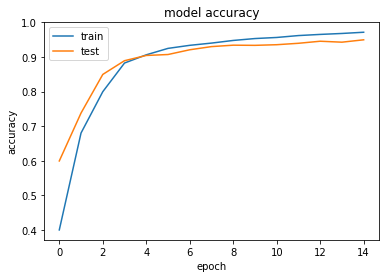

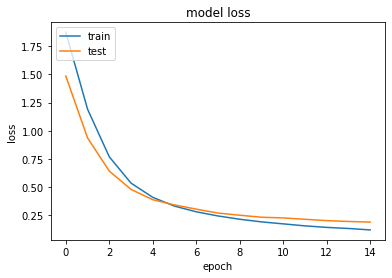

In [42]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()